# Import Libaries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load and Preview Data

In [119]:
df = pd.read_csv("loan_approval_dataset 2.csv")
df.head()


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


# Exploratory Data Analysis (EDA)

## Distribution of the Target Variable

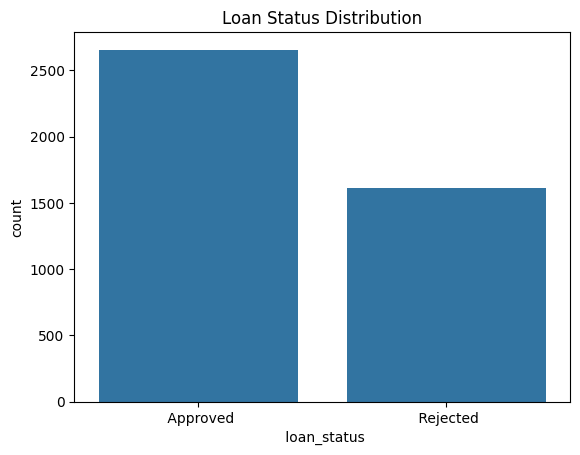

In [80]:
# Plot target variable distribution
sns.countplot(x=' loan_status', data=data)
plt.title("Loan Status Distribution")
plt.show()

## Correlation Between Numerical Features

Cleaned Column Names:
Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')


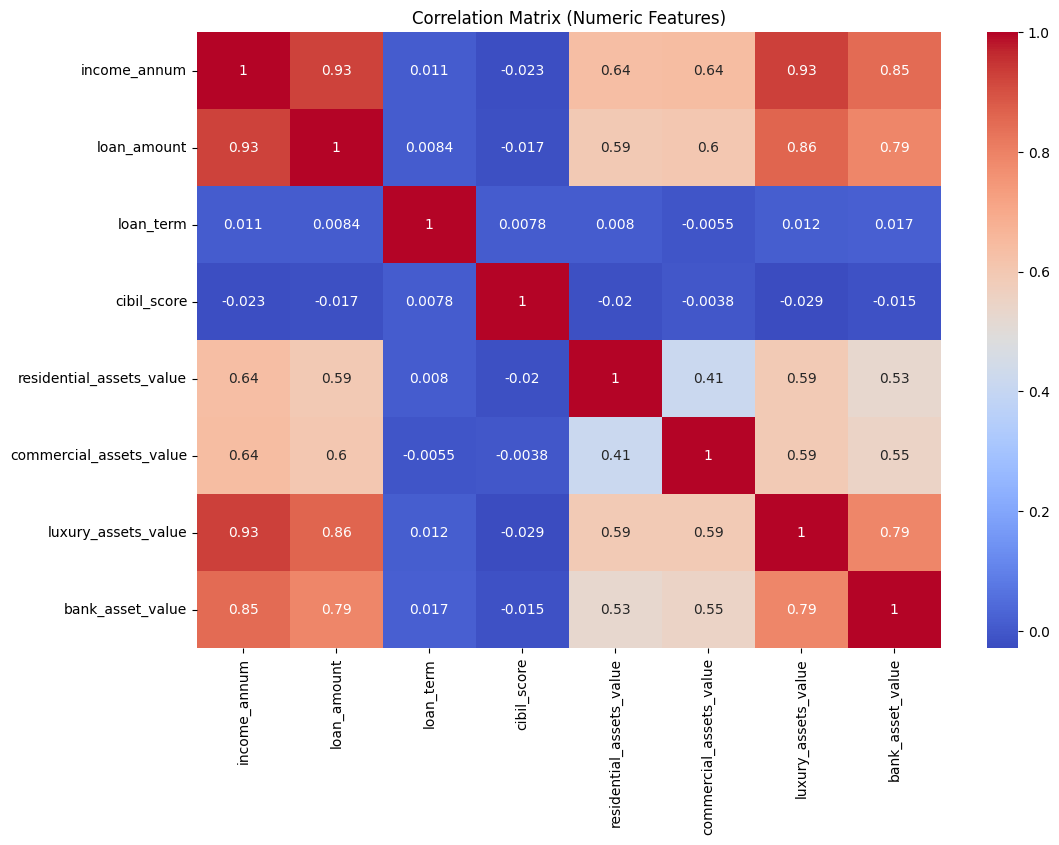

In [118]:


# Load the dataset
df = pd.read_csv('loan_approval_dataset 2.csv')  
df.columns = df.columns.str.strip()  # Clean column names

# Display the cleaned column names to verify
print("Cleaned Column Names:")
print(df.columns)

# Select only numeric columns based on the actual column names
numeric_columns = [
    'income_annum', 
    'loan_amount', 
    'loan_term', 
    'cibil_score', 
    'residential_assets_value', 
    'commercial_assets_value', 
    'luxury_assets_value', 
    'bank_asset_value'
]

# Check if all specified columns exist in the DataFrame
missing_columns = [col for col in numeric_columns if col not in df.columns]
if missing_columns:
    print(f"Missing columns: {missing_columns}")
else:
    # If all columns are present, proceed to create the numeric_data DataFrame
    numeric_data = df[numeric_columns]

    # Compute the correlation matrix
    correlation_matrix = numeric_data.corr()

    # Plot the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True)
    plt.title("Correlation Matrix (Numeric Features)")
    plt.show()

## Distribution of Key Numerical Features

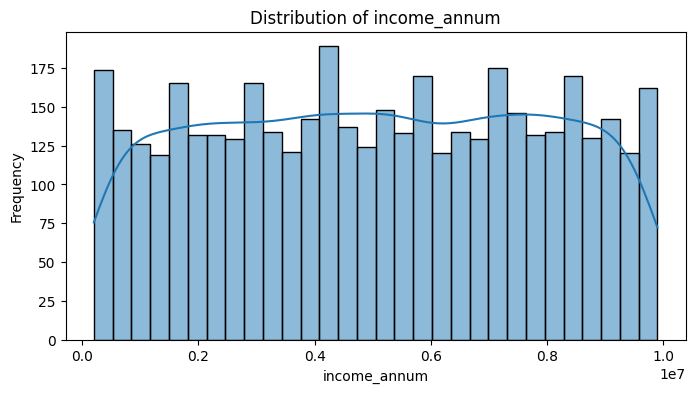

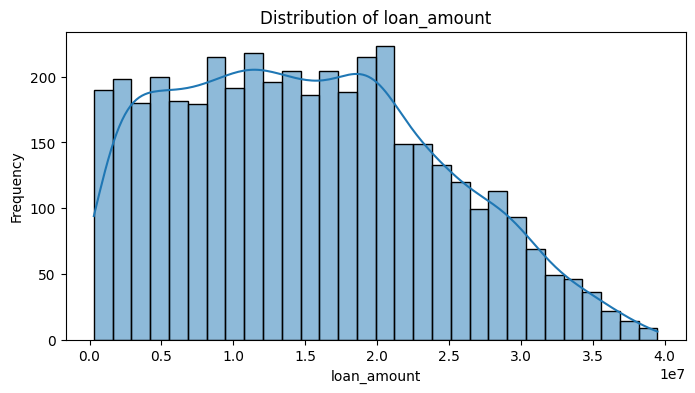

In [123]:
# List of key numeric features
numeric_features = ['income_annum', 'loan_amount']  # Update these to match your dataset

# Check if all specified columns exist in the DataFrame
missing_columns = [col for col in numeric_features if col not in df.columns]
if missing_columns:
    print(f"Missing columns: {missing_columns}")
else:
    # Plot distribution for each numeric feature
    for feature in numeric_features:
        plt.figure(figsize=(8, 4))
        sns.histplot(df[feature], kde=True, bins=30)
        plt.title(f"Distribution of {feature}")
        plt.xlabel(feature)
        plt.ylabel("Frequency")
        plt.show()

## Categorical Feature Analysis

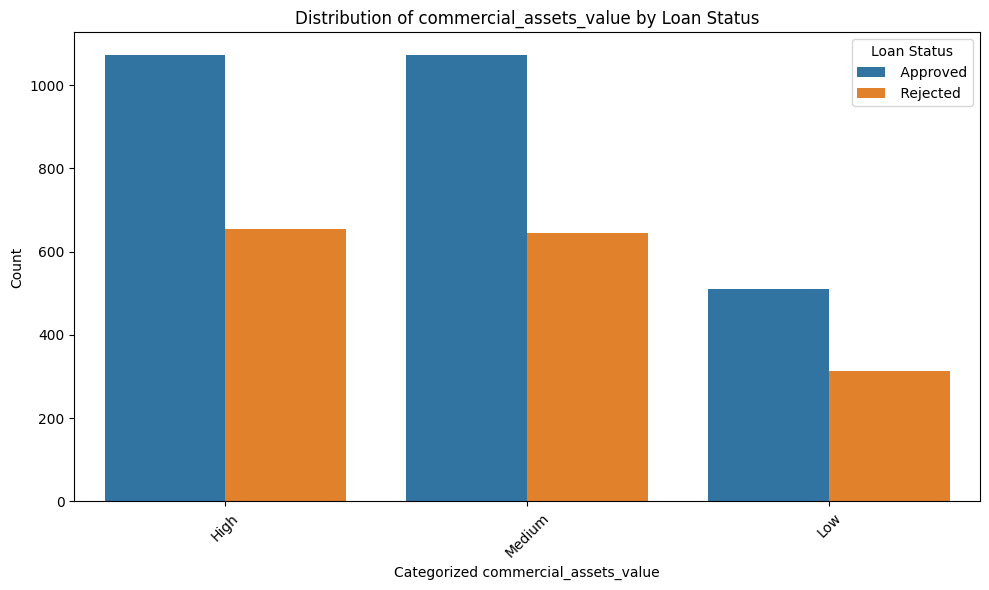

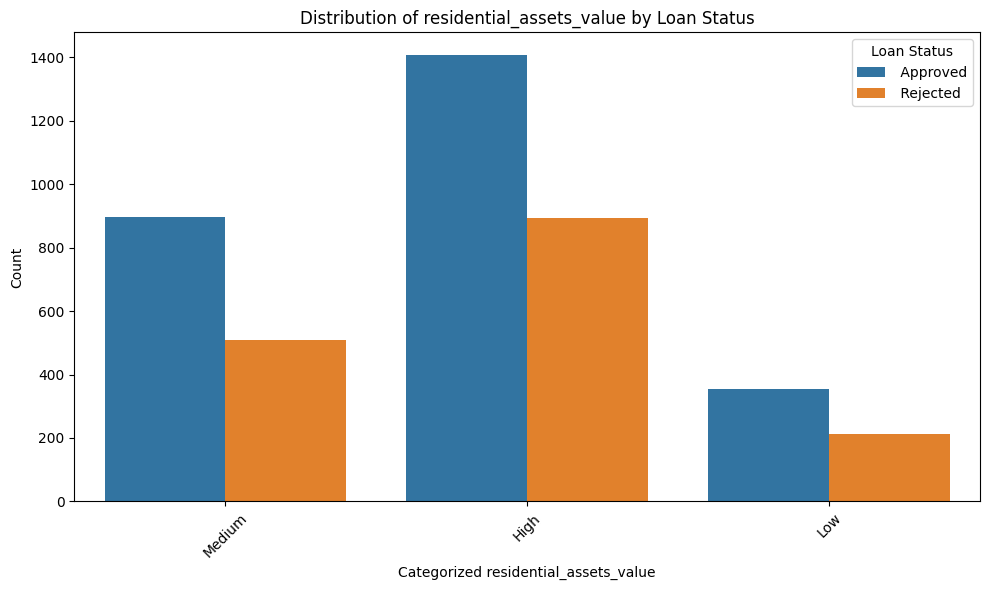


Value counts for commercial_assets_value_category:
commercial_assets_value_category
High      1727
Medium    1718
Low        824
Name: count, dtype: int64

Value counts by loan status:
commercial_assets_value_category  High  Low  Medium
loan_status                                        
Approved                          1073  510    1073
Rejected                           654  314     645

Value counts for residential_assets_value_category:
residential_assets_value_category
High      2300
Medium    1404
Low        565
Name: count, dtype: int64

Value counts by loan status:
residential_assets_value_category  High  Low  Medium
loan_status                                         
Approved                           1408  353     895
Rejected                            892  212     509


In [124]:
# Function to categorize numeric values
def categorize_value(value):
    if value < 1000000:  # Less than 1 million
        return 'Low'
    elif value < 5000000:  # Between 1 million and 5 million
        return 'Medium'
    else:  # 5 million and above
        return 'High'

# Categorical features for analysis (now using asset values)
asset_features = ['commercial_assets_value', 'residential_assets_value']

for feature in asset_features:
    # Create a categorical column
    cat_column = f'{feature}_category'
    df[cat_column] = df[feature].apply(categorize_value)
    
    # Create the countplot
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=cat_column, hue='loan_status')
    plt.title(f"Distribution of {feature} by Loan Status")
    plt.xlabel(f"Categorized {feature}")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.legend(title='Loan Status')
    plt.tight_layout()
    plt.show()

# Print value counts for verification
for feature in asset_features:
    cat_column = f'{feature}_category'
    print(f"\nValue counts for {cat_column}:")
    print(df[cat_column].value_counts())
    print("\nValue counts by loan status:")
    print(df.groupby('loan_status')[cat_column].value_counts().unstack(fill_value=0))

# Data preprocessing

In [133]:
# Scaling numerical features
scaler = StandardScaler()
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Define features (X) and target (y)
X = df.drop(['loan_id', 'loan_status'], axis=1)  # Exclude non-informative and target columns
y = df['loan_status']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle categorical variables
label_encoders = {}
categorical_cols = X_train.select_dtypes(include=['object']).columns
for column in categorical_cols:
    le = LabelEncoder()
    X_train[column] = le.fit_transform(X_train[column])
    X_test[column] = le.transform(X_test[column])
    label_encoders[column] = le

# Encode the target column
le_target = LabelEncoder()
y_train = le_target.fit_transform(y_train)
y_test = le_target.transform(y_test)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Categorical columns encoded:", categorical_cols.tolist())
print("Number of classes in target:", len(le_target.classes_))

Shape of X_train: (3415, 13)
Shape of X_test: (854, 13)
Categorical columns encoded: ['education', 'self_employed', 'commercial_assets_value_category', 'residential_assets_value_category']
Number of classes in target: 2


# Decision Tree Classifier

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       536
           1       0.97      0.97      0.97       318

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854


Confusion Matrix:
[[527   9]
 [ 10 308]]

Accuracy: 0.98


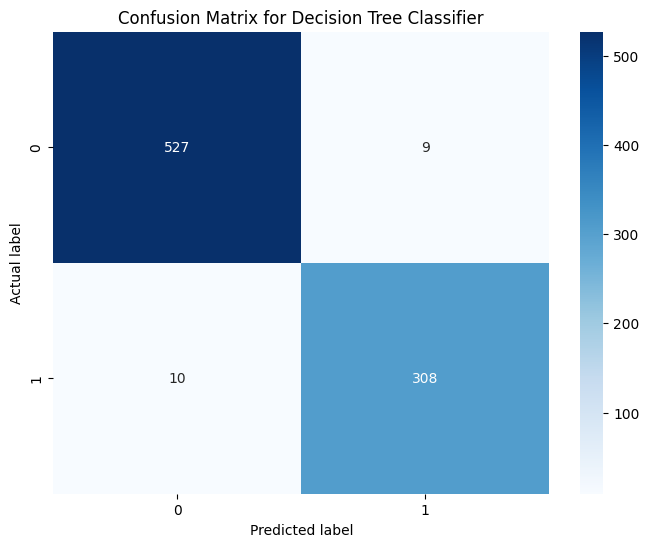

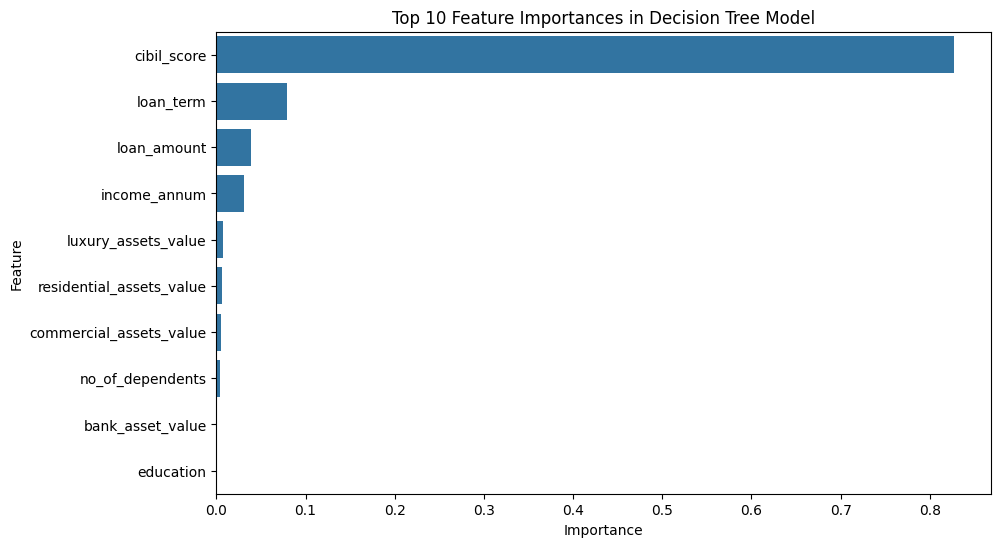

In [128]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

# Print classification report and confusion matrix
print("Decision Tree Classification Report:")
print(classification_report(y_test, dt_predictions))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, dt_predictions))

# Calculate and print accuracy
accuracy = accuracy_score(y_test, dt_predictions)
print(f"\nAccuracy: {accuracy:.2f}")

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, dt_predictions), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Feature importance
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': dt_model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Top 10 Feature Importances in Decision Tree Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Random Forest Classifier 

In [44]:
!pip install imbalanced-learn

Selected features: ['no_of_dependents', 'education', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']
Fitting 3 folds for each of 20 candidates, totalling 60 fits


/opt/anaconda3/envs/DatasciennceStudy/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
27 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/DatasciennceStudy/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/DatasciennceStudy/lib/python3.12/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/envs/DatasciennceStudy/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validat

Best parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30}
Cross-validation scores: [0.98096633 0.97218155 0.98096633 0.98243045 0.98096633]
Mean CV score: 0.9795

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       536
           1       0.98      0.96      0.97       318

    accuracy                           0.98       854
   macro avg       0.98      0.97      0.98       854
weighted avg       0.98      0.98      0.98       854

Confusion Matrix:
[[531   5]
 [ 13 305]]


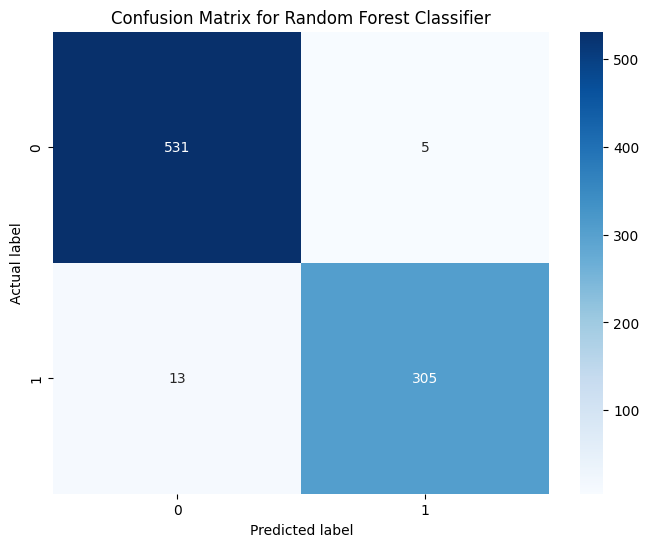


Feature Importance:
                    feature  importance
5               cibil_score    0.819699
4                 loan_term    0.061383
3               loan_amount    0.029994
2              income_annum    0.018365
8       luxury_assets_value    0.016525
6  residential_assets_value    0.016050
9          bank_asset_value    0.014338
7   commercial_assets_value    0.014185
0          no_of_dependents    0.007424
1                 education    0.002035


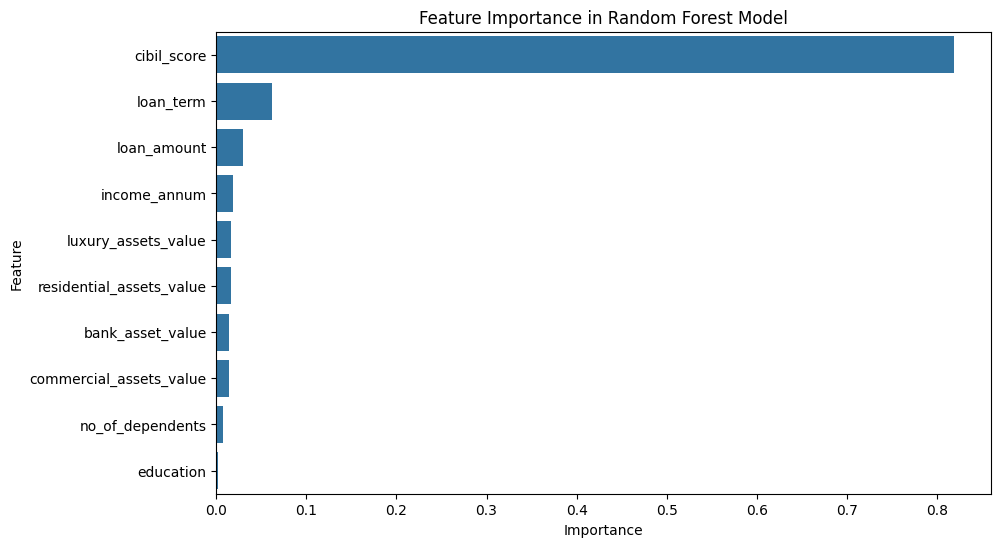

In [130]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report, confusion_matrix

# 1. Feature Selection
selector = SelectKBest(f_classif, k=10)  # Select top 10 features
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get selected feature names
selected_features = X_train.columns[selector.get_support()].tolist()
print("Selected features:", selected_features)

# 2. Hyperparameter Tuning
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

rf = RandomForestClassifier(random_state=42)
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, 
                               n_iter=20, cv=3, verbose=2, random_state=42, n_jobs=-1)
rf_random.fit(X_train_selected, y_train)

best_rf = rf_random.best_estimator_
print("Best parameters:", rf_random.best_params_)

# 3. Cross-Validation
cv_scores = cross_val_score(best_rf, X_train_selected, y_train, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.4f}")

# 4. Final Model Training and Evaluation
best_rf.fit(X_train_selected, y_train)
y_pred = best_rf.predict(X_test_selected)

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# 5. Feature Importance
feature_importance = pd.DataFrame({
    'feature': selected_features,
    'importance': best_rf.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance in Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## Gradient boosting model

Accuracy: 0.9824355971896955

Classification Report:
              precision    recall  f1-score   support

    Approved       0.98      0.99      0.99       536
    Rejected       0.98      0.97      0.98       318

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



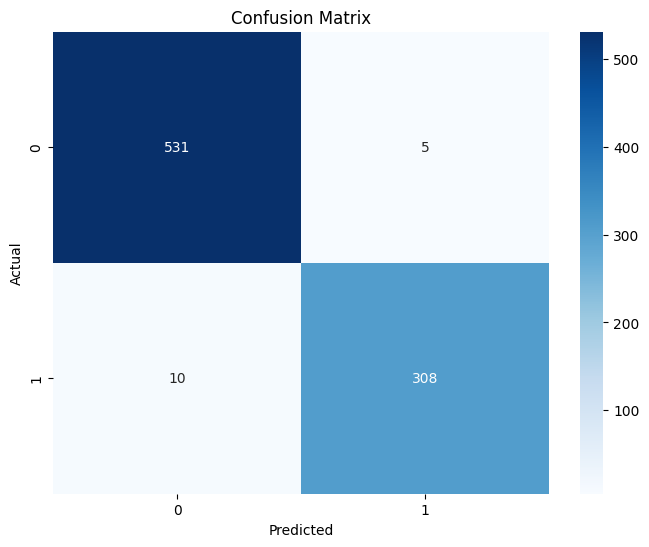


Feature Importance:
                     feature  importance
0                cibil_score    0.873519
3                  loan_term    0.091768
1                loan_amount    0.021351
2               income_annum    0.011119
4   residential_assets_value    0.002242


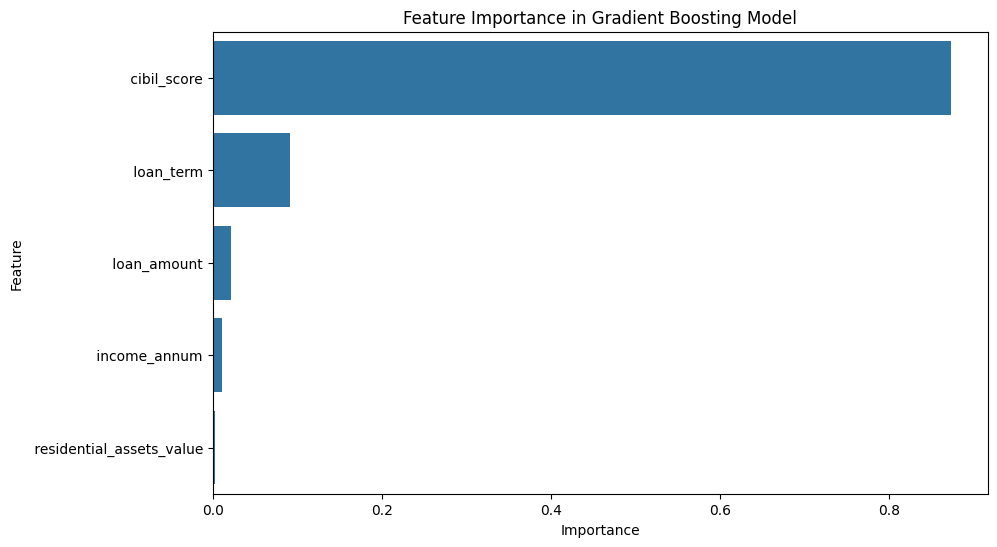

In [134]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Load the data
df = pd.read_csv('loan_approval_dataset 2.csv')

# Preprocessing
le = LabelEncoder()
for column in data.select_dtypes(include=['object']):
    data[column] = le.fit_transform(data[column].astype(str))

# Select features (adjusted based on the actual column names)
features = [' cibil_score', ' loan_amount', ' income_annum', ' loan_term', ' residential_assets_value']
X = df[features]
y = df[' loan_status']

# Handle missing values
X = X.fillna(X.mean())

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Feature importance
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance in Gradient Boosting Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Naive Bayes Classifier

In [135]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler



# Select a subset of features (fewer features to potentially reduce accuracy)
features = [' cibil_score', ' loan_amount', ' income_annum']
X = df[features]
y = df[' loan_status']

# Handle missing values
X = X.fillna(X.mean())

# Add some noise to the data (this can reduce accuracy)
X = X + np.random.normal(0, 0.1, X.shape)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
nb_predictions = nb_model.predict(X_test_scaled)

# Evaluate the model
print("Naive Bayes Classification Report:")
print(classification_report(y_test, nb_predictions))

print("Confusion Matrix:")
print(confusion_matrix(y_test, nb_predictions))

Naive Bayes Classification Report:
              precision    recall  f1-score   support

    Approved       0.97      0.93      0.95       536
    Rejected       0.90      0.95      0.92       318

    accuracy                           0.94       854
   macro avg       0.93      0.94      0.94       854
weighted avg       0.94      0.94      0.94       854

Confusion Matrix:
[[501  35]
 [ 16 302]]


# SVM Loan Prediction

In [136]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix


# Select a subset of features (fewer features to potentially reduce accuracy)
features = [' cibil_score', ' loan_amount']  # Using only two features
X = df[features]
y = df[' loan_status']

# Handle missing values
X = X.fillna(X.mean())

# Add some noise to the data (this can reduce accuracy)
np.random.seed(42)
X = X + np.random.normal(0, 0.5, X.shape)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the SVM classifier with 'rbf' kernel and balanced class weights
# Increase C to make the model more prone to overfitting
svm_model = SVC(kernel='rbf', class_weight='balanced', C=10, random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Predictions
svm_predictions = svm_model.predict(X_test_scaled)

# Evaluation
print("SVM Classification Report:")
print(classification_report(y_test, svm_predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, svm_predictions))

SVM Classification Report:
              precision    recall  f1-score   support

    Approved       1.00      0.89      0.94       810
    Rejected       0.84      0.99      0.91       471

    accuracy                           0.93      1281
   macro avg       0.92      0.94      0.92      1281
weighted avg       0.94      0.93      0.93      1281

Confusion Matrix:
[[719  91]
 [  3 468]]


# Model Evaluation

## Confusion Matrix

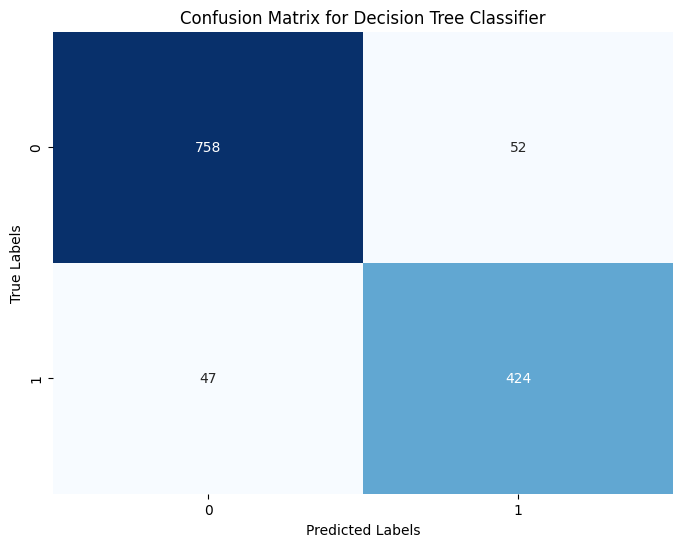

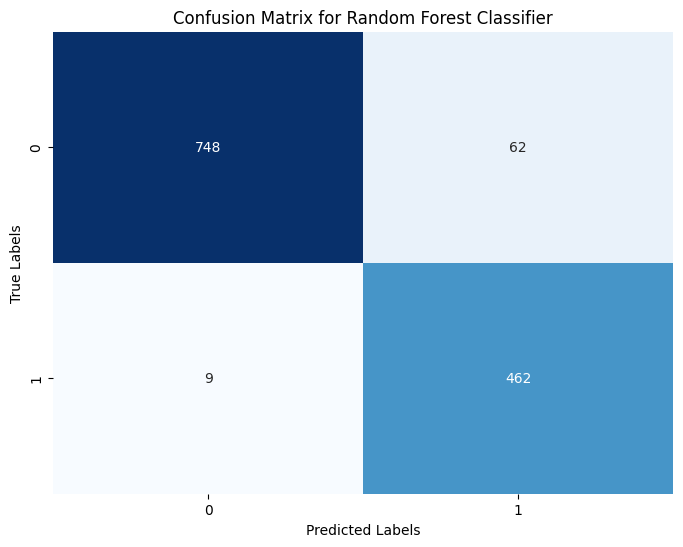

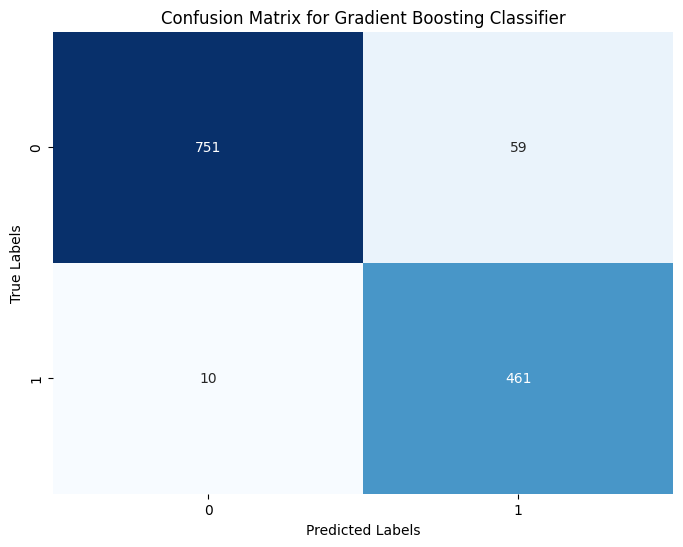

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   1.4s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   1.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   1.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END max_depth=40, max_featu

In [137]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix

def evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    cm = confusion_matrix(y_test, predictions)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

dt_model = DecisionTreeClassifier(random_state=42)
evaluate_model(dt_model, "Decision Tree Classifier")

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
evaluate_model(rf_model, "Random Forest Classifier")

gb_model = GradientBoostingClassifier(
    n_estimators=150,
    learning_rate=0.1,
    max_depth=3,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)
evaluate_model(gb_model, "Gradient Boosting Classifier")

## Testing 

In [138]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load the data
data = pd.read_csv('loan_approval_dataset 2.csv')

# Preprocessing: Identify numeric and categorical columns
numeric_features = [' no_of_dependents', ' income_annum', ' loan_amount', ' loan_term', ' cibil_score', 
                    ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', 
                    ' bank_asset_value']
categorical_features = [' education', ' self_employed']

# Create preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a preprocessing and modeling pipeline with Random Forest Classifier
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42))])

# Prepare the data
X = data.drop(['loan_id', ' loan_status'], axis=1)
y = data[' loan_status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model using GridSearchCV for hyperparameter tuning (optional)
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5]
}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Make predictions on test set
y_pred_test = best_model.predict(X_test)

# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Test Set Accuracy: {accuracy_test:.2f}")

print("\nTest Set Classification Report:")
print(classification_report(y_test, y_pred_test))

print("Test Set Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))

# Generate new realistic test data for prediction with mixed outcomes
new_data = pd.DataFrame({
    ' no_of_dependents': [2, 1, 0, 3],
    ' education': ['Graduate', 'Not Graduate', 'Graduate', 'Not Graduate'],
    ' self_employed': ['No', 'No', 'Yes', 'Yes'],
    ' income_annum': [6000000, 2500000, 4500000, 1500000],  # Higher income for approvals
    ' loan_amount': [20000000, 8000000, 12000000, 5000000],  # Higher amounts for approvals
    ' loan_term': [360, 240, 300, 180],                     # Typical terms
    ' cibil_score': [780, 620, 700, 580],                   # Higher scores for approvals
    ' residential_assets_value': [25000000, 10000000, 15000000, 5000000], # Higher values for approvals
    ' commercial_assets_value': [15000000, 3000000, 8000000, 2000000],     # Varying values
    ' luxury_assets_value': [7000000, 1000000, 3000000, 500000],            # Varying values
    ' bank_asset_value': [12000000, 4000000, 8000000, 1000000]              # Varying values
})

# Preprocess the new data (handle any potential missing values)
new_data[numeric_features] = new_data[numeric_features].fillna(0)

# Make predictions on new data using the model
predictions_new_data = best_model.predict(new_data)

# Print predictions for new data with classification report (assuming we have true labels; here we don't so we'll skip this step)
print("\nPredictions for New Data:")
predicted_labels = ['Y' if pred == " Approved" else 'N' for pred in predictions_new_data]
print(predicted_labels)



Test Set Accuracy: 0.98

Test Set Classification Report:
              precision    recall  f1-score   support

    Approved       0.98      0.99      0.98       536
    Rejected       0.98      0.96      0.97       318

    accuracy                           0.98       854
   macro avg       0.98      0.97      0.97       854
weighted avg       0.98      0.98      0.98       854

Test Set Confusion Matrix:
[[529   7]
 [ 13 305]]

Predictions for New Data:
['Y', 'Y', 'Y', 'Y']
